## Итоговый проект: Fashion-MNIST
Fashion-MNIST – это датасет состоящий из 70000 черно-белых изображений одежды 28х28 пикселей каждое. 60000 из них содержатся в тренировочной выборке, и 10000 – в тестовой. Этот набор данных представляет из себя альтернативу обычному датасету рукописных цифр MNIST. Существовало несколько предпосылок для создания такого набора данных.

Большинство исследователей в области машинного и глубинного обучения используют MNIST при первой проверки своих моделей, что не всегда является хорошей идеей. Если какая-то модель не работает на датасете MNIST – это не значит, что она не работает в принципе. Если какая-то модель прекрасно работает на датасете MNIST – это не означает, что она так же хорошо будет работать на других датасетах. Известны случаи в отказе публикации некоторых статей из-за недостаточно хорошего качества модели на MNIST. Поэтому Zalando Research предложили альтернативу.

В Fashion-MNIST содержится 10 классов разной одежды по аналогии с 10 цифрами из MNIST. Скачать датасет и найти его подробное описание можно найти здесь

[Fashion-MNIST](https://www.kaggle.com/zalando-research/fashionmnist)

In [3]:
import os
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split
import random

In [9]:
data_test = pd.read_csv("fashion-mnist_test.csv")
data_test.shape

(10000, 785)

In [11]:
data_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
data_train = pd.read_csv("fashion-mnist_train.csv")
data_train.shape

(60000, 785)

### посмотрим на силуэты

In [18]:
def picture_show(data, num, ax=plt):
    picture = data.drop("label", axis=1).values[num].reshape((28, 28))
    ax.imshow(picture, cmap=plt.cm.binary);

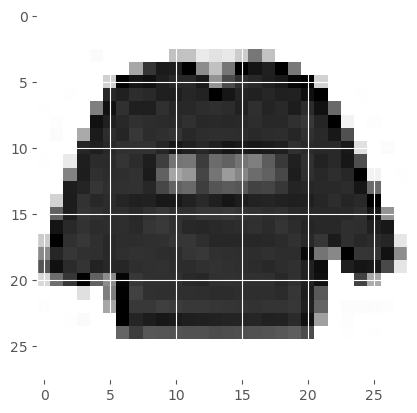

In [24]:
picture_show(data_train, 0)

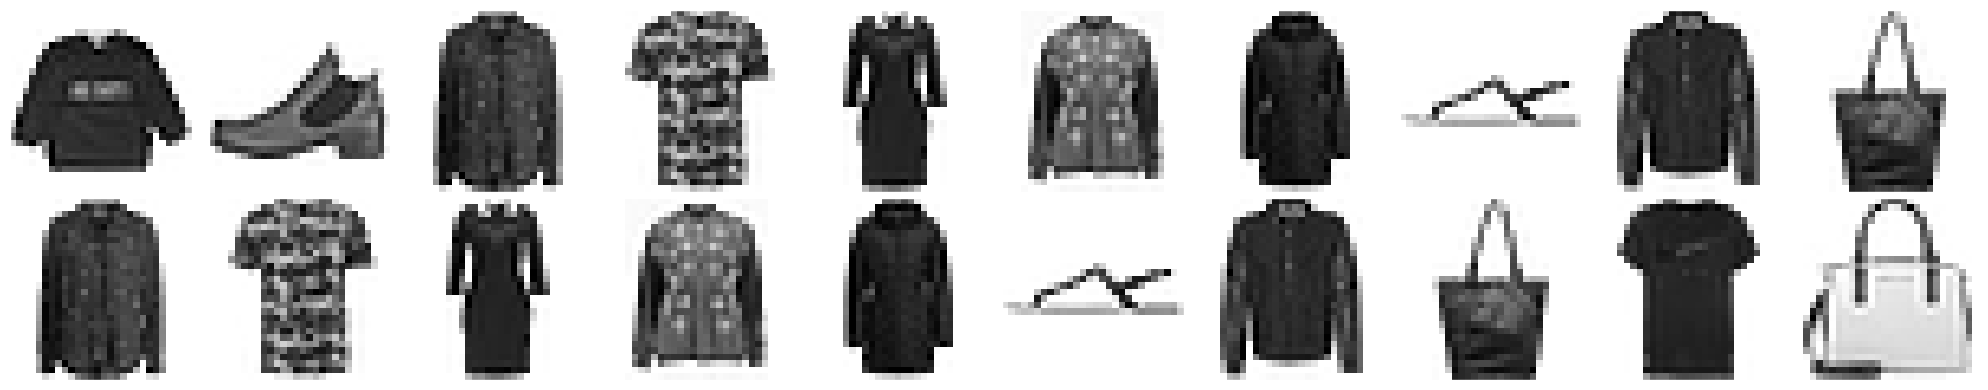

In [30]:
nrows, ncols = 2, 10
fig, ax = plt.subplots(nrows, ncols, figsize=(2*ncols, 2*nrows))
for row in range(nrows):
    for col in range(ncols):
        num = row * nrows + col
        picture_show(data_train, num, ax[row, col])
        ax[row, col].set_xticks([])
        ax[row, col].set_yticks([])
plt.tight_layout()

### Подготовим данные

In [34]:
def get_x_y(data, num_classes=10):
    x = data.drop("label", axis=1).values.reshape(-1, 784).astype("float32") / 255
    y = tf.keras.utils.to_categorical(data["label"].values, num_classes)
    return x, y

In [36]:
num_classes = 10 

x, y = get_x_y(data_train, num_classes)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=42)

x_test, y_test = get_x_y(data_test, num_classes)

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((45000, 784),
 (45000, 10),
 (15000, 784),
 (15000, 10),
 (10000, 784),
 (10000, 10))

### 1. Логистическая регрессия
    Для решения задачи классификации предлагается начать с использования логистической регрессии. В данном случае, количество признаков равно 28x28=784, так же мы имеем 60000 объектов в тренировочной выборке. Поэтому рекомендуется использовать tensorflow или keras для выполнения этого задания. Используйте стохастический градиентный спуск (stochastic gradient descent) в качестве алгоритма оптимизации.
    По своей сути, логистическая регрессия может быть реализована как нейронная сеть без скрытых слоев. В выходном слое содержится количество нейронов, равное количеству классов. В качестве функции активации выходного слоя следует использовать softmax.
    Обучите логистическую регрессию на тренировочной выборке и оцените качество на тестовой выборке используя метрику accuracy. Постройте график качества модели на валидационной выборке от количества эпох. Для этого вы можете использовать утилиту tensorboard.

In [40]:
def create_model():
    model = tf.keras.models.Sequential() 
    model.add(tf.keras.layers.Dense(num_classes, input_shape=(784,), activation="softmax"))

    model.compile(
        loss="categorical_crossentropy", 
        optimizer="sgd", 
        metrics=["accuracy"]
    )
    return model

In [42]:
model = create_model()
model.summary()

C:\ProgramData\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
class AccuracyHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.accuracy = []
        self.val_accuracy = []

    def on_epoch_end (self, epoch, logs={}):
        self.accuracy.append(logs.get('accuracy'))
        self.val_accuracy.append(logs.get('val_accuracy'))

In [46]:
random.seed(17)

history = AccuracyHistory()
model.fit(x_train, y_train, epochs=20, validation_freq=1, verbose=1, validation_data=(x_val, y_val), callbacks=[history])

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6365 - loss: 1.1592 - val_accuracy: 0.7843 - val_loss: 0.6678
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7933 - loss: 0.6448 - val_accuracy: 0.8067 - val_loss: 0.5898
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8132 - loss: 0.5780 - val_accuracy: 0.8139 - val_loss: 0.5514
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8239 - loss: 0.5417 - val_accuracy: 0.8206 - val_loss: 0.5314
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8270 - loss: 0.5266 - val_accuracy: 0.8246 - val_loss: 0.5158
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8309 - loss: 0.5065 - val_accuracy: 0.8295 - val_loss: 0.5026
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8332 - loss: 0.4980 - val_accuracy: 0.8258 - val_loss: 0.5028
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8352 - loss: 0.4891 - 

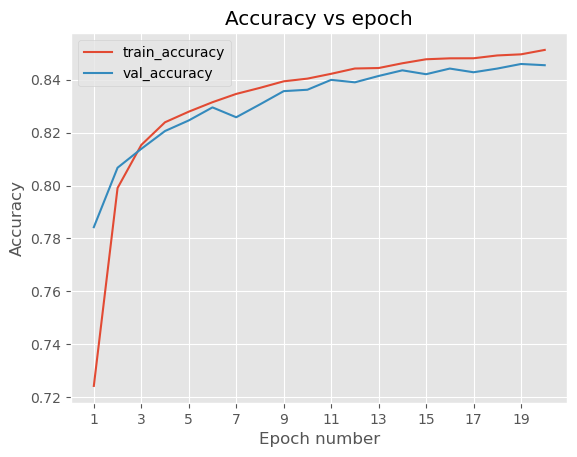

In [48]:
plt.plot(range(1, 21), history.accuracy, label="train_accuracy")
plt.plot(range(1, 21), history.val_accuracy, label="val_accuracy")
plt.legend()
plt.xticks(range(1, 21, 2))
plt.title("Accuracy vs epoch")
plt.ylabel("Accuracy")
plt.xlabel("Epoch number");

In [52]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0) 
print("Test loss:", loss) 
print("Test accuracy:", accuracy)

Test loss: 0.45087993144989014
Test accuracy: 0.8476999998092651


## 2. Полносвязная нейронная сеть

Далее, попробуйте реализовать полносвязную нейронную сеть с несколькими скрытыми слоями. Обучите модель и посчитайте качество на тестовой выборке. Как оно изменилось в сравнении с логистической регрессией? Как вы можете объяснить этот результат?

In [55]:
def create_model():
    model = tf.keras.models.Sequential() 
    model.add(tf.keras.layers.Dense(256, activation="relu", input_shape=(784,))) 
    model.add(tf.keras.layers.Dense(256, activation="relu"))
    model.add(tf.keras.layers.Dense(num_classes, activation="softmax"))

    model.compile(
        loss="categorical_crossentropy", 
        optimizer="sgd", 
        metrics=["accuracy"]
    )
    return model

In [57]:
model = create_model()
model.summary()

C:\ProgramData\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
random.seed(17)

history = AccuracyHistory()
model.fit(x_train, y_train, epochs=20, validation_freq=1, verbose=1, validation_data=(x_val, y_val), callbacks=[history])

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6653 - loss: 1.0833 - val_accuracy: 0.8052 - val_loss: 0.5569
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8174 - loss: 0.5301 - val_accuracy: 0.8063 - val_loss: 0.5278
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8373 - loss: 0.4692 - val_accuracy: 0.8358 - val_loss: 0.4525
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8437 - loss: 0.4445 - val_accuracy: 0.8231 - val_loss: 0.4856
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8484 - loss: 0.4251 - val_accuracy: 0.8221 - val_loss: 0.4833
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8567 - loss: 0.4054 - val_accuracy: 0.8424 - val_loss: 0.4312
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8632 - loss: 0.3887 - val_accuracy: 0.8431 - val_loss: 0.4352
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8686 - loss: 0.3734 - 

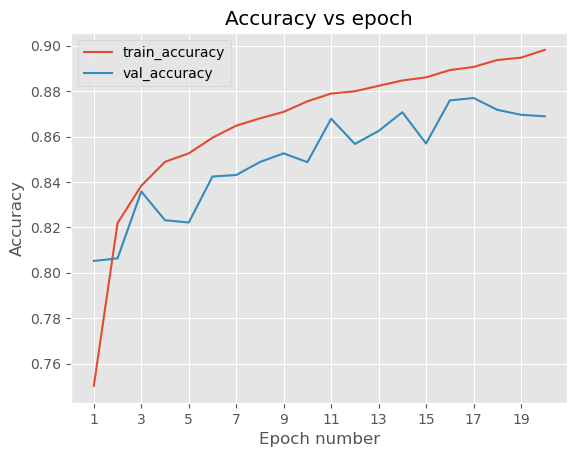

In [61]:
plt.plot(range(1, 21), history.accuracy, label="train_accuracy")
plt.plot(range(1, 21), history.val_accuracy, label="val_accuracy")
plt.legend()
plt.xticks(range(1, 21, 2))
plt.title("Accuracy vs epoch")
plt.ylabel("Accuracy")
plt.xlabel("Epoch number");

In [63]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0) 
print("Test loss:", loss) 
print("Test accuracy:", accuracy)

Test loss: 0.35209688544273376
Test accuracy: 0.873199999332428


## Анализ:
Качество по accuracy на тестовой выборке выросло. Объяснить можно наличием скрытых слоев с нелинейными функциями активации

## 3. Сверточная нейронная сеть

После этого вам предлагается реализовать сверточную нейронную сеть. В данном случае лучше использовать готовые слои, которые предоставляют keras или tensorflow.

In [77]:
x_train = x_train.reshape(-1, 28, 28, 1) 
x_val = x_val.reshape(-1, 28, 28, 1) 
x_test = x_test.reshape(-1, 28, 28, 1)

Начните с модели с несколькими сверточными слоями. Так же рекомендуется использовать слои суб-дискретизации, например Max Pooling слои. Они понижают размерность исходных данных и выделяют наиболее важные признаки из данных. Посчитайте качество получившейся модели на тестовой выборке. Сравните полученные результаты с результатами полносвязной нейронной сети.

In [79]:
def create_model():
    model = tf.keras.models.Sequential() 
    model.add(tf.keras.layers.Convolution2D(filters=32, input_shape=(28, 28, 1), kernel_size=(3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Convolution2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation="relu"))
    model.add(tf.keras.layers.Dense(num_classes, activation="softmax"))

    model.compile(
        loss="categorical_crossentropy", 
        optimizer="sgd", 
        metrics=["accuracy"]
    )
    return model

In [80]:
model = create_model()
model.summary()

C:\ProgramData\Anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
random.seed(17)

history = AccuracyHistory()
model.fit(x_train, y_train, epochs=20, validation_freq=1, verbose=1,  validation_data=(x_val, y_val), callbacks=[history])

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5049 - loss: 1.4291 - val_accuracy: 0.7393 - val_loss: 0.7681
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7655 - loss: 0.6219 - val_accuracy: 0.7531 - val_loss: 0.6299
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8032 - loss: 0.5271 - val_accuracy: 0.7548 - val_loss: 0.6515
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8275 - loss: 0.4709 - val_accuracy: 0.7991 - val_loss: 0.5248
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.8457 - loss: 0.4314 - val_accuracy: 0.8490 - val_loss: 0.4236
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8523 - loss: 0.4107 - val_accuracy: 0.8392 - val_loss: 0.4323
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.8573 - loss: 0.3921 - val_accuracy: 0.8629 - val_loss: 0.3853
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8681 - los

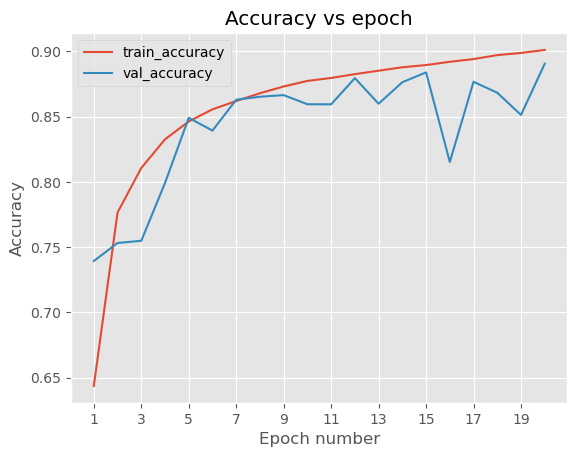

In [82]:
plt.plot(range(1, 21), history.accuracy, label="train_accuracy")
plt.plot(range(1, 21), history.val_accuracy, label="val_accuracy")
plt.legend()
plt.xticks(range(1, 21, 2))
plt.title("Accuracy vs epoch")
plt.ylabel("Accuracy")
plt.xlabel("Epoch number");

In [89]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0) 
print("Test loss:", loss) 
print("Test accuracy:", accuracy)

Test loss: 0.291126549243927
Test accuracy: 0.8952000141143799


Далее, попробуйте увеличить количество слоев в вашей нейронной сети. Достаточно добавить несколько новых сверточных слоев. Проанализируете, как изменилось качество в этом случае.

In [91]:
def create_model():
    model = tf.keras.models.Sequential() 
    model.add(tf.keras.layers.Convolution2D(filters=32, input_shape=(28, 28, 1), kernel_size=(3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Convolution2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Convolution2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(tf.keras.layers.Convolution2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation="relu"))
    model.add(tf.keras.layers.Dense(num_classes, activation="softmax"))

    model.compile(
        loss="categorical_crossentropy", 
        optimizer="sgd", 
        metrics=["accuracy"]
    )
    return model

In [93]:
model = create_model()
model.summary()

C:\ProgramData\Anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 1, 1, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 97,482 (380.79 KB)

 Trainable params: 97,482 (380.79 KB)

 Non-trainable params: 0 (0.00 B)

In [95]:
random.seed(17)

history = AccuracyHistory()
model.fit(x_train, y_train, epochs=20, validation_freq=1, verbose=1,  validation_data=(x_val, y_val), callbacks=[history])

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.3825 - loss: 1.6308 - val_accuracy: 0.6514 - val_loss: 0.8276
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7403 - loss: 0.6863 - val_accuracy: 0.7491 - val_loss: 0.6167
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.7825 - loss: 0.5714 - val_accuracy: 0.7904 - val_loss: 0.5541
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8062 - loss: 0.5185 - val_accuracy: 0.7108 - val_loss: 0.8120
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8277 - loss: 0.4698 - val_accuracy: 0.8323 - val_loss: 0.4542
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.8352 - loss: 0.4443 - val_accuracy: 0.8315 - val_loss: 0.4555
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.8495 - loss: 0.4126 - val_accuracy: 0.8555 - val_loss: 0.3962
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.8594 -

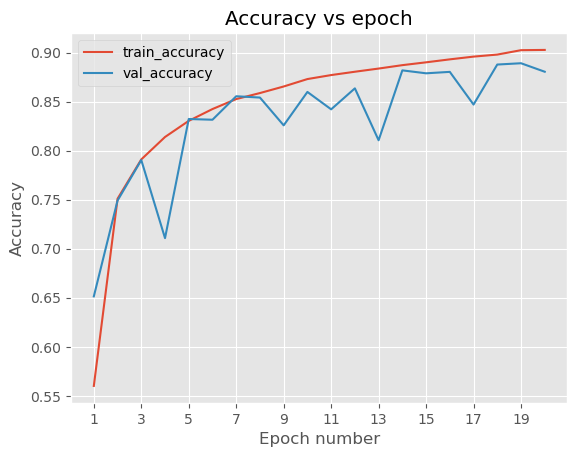

In [97]:
plt.plot(range(1, 21), history.accuracy, label="train_accuracy")
plt.plot(range(1, 21), history.val_accuracy, label="val_accuracy")
plt.legend()
plt.xticks(range(1, 21, 2))
plt.title("Accuracy vs epoch")
plt.ylabel("Accuracy")
plt.xlabel("Epoch number");

In [99]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0) 
print("Test loss:", loss) 
print("Test accuracy:", accuracy)

Test loss: 0.32324400544166565
Test accuracy: 0.8817999958992004


## Анализ:
Добавление сверточных слоев качество на трейне увеличило, на валидации и тесте качество даже уменьшилось. Все указывает на переобучение, похоже - требуется усиление регуляризации.

В заключение, рекомендуется попробовать добавить Batch Normalization слои. Обычно они располагаются после сверточных слоев или слоев полносвязной нейронной сети. Обычно они улучшают качество модели, этим объясняется их популярность использования в современных архитектурах нейронных сетей. Однако, это требует проверки для конкретной модели и конкретного набора данных.

In [102]:
def create_model():
    model = tf.keras.models.Sequential() 
    model.add(tf.keras.layers.Convolution2D(filters=32, input_shape=(28, 28, 1), kernel_size=(3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Convolution2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Convolution2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Convolution2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation="relu"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dense(num_classes, activation="softmax"))

    model.compile(
        loss="categorical_crossentropy", 
        optimizer="sgd", 
        metrics=["accuracy"]
    )
    return model

In [104]:
model = create_model()
model.summary()

C:\ProgramData\Anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 3, 3, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 1, 1, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 98,250 (383.79 KB)

 Trainable params: 97,866 (382.29 KB)

 Non-trainable params: 384 (1.50 KB)

In [106]:
random.seed(17)

history = AccuracyHistory()
model.fit(x_train, y_train, epochs=20, validation_freq=1, verbose=1,  validation_data=(x_val, y_val), callbacks=[history])

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7558 - loss: 0.7149 - val_accuracy: 0.8312 - val_loss: 0.4408
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - accuracy: 0.8652 - loss: 0.3741 - val_accuracy: 0.8569 - val_loss: 0.4010
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 28s 20ms/step - accuracy: 0.8802 - loss: 0.3320 - val_accuracy: 0.8764 - val_loss: 0.3452
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.8971 - loss: 0.2875 - val_accuracy: 0.8918 - val_loss: 0.2998
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 27s 19ms/step - accuracy: 0.9070 - loss: 0.2614 - val_accuracy: 0.8843 - val_loss: 0.3223
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 28s 20ms/step - accuracy: 0.9143 - loss: 0.2396 - val_accuracy: 0.8881 - val_loss: 0.3136
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.9166 - loss: 0.2296 - val_accuracy: 0.8925 - val_loss: 0.2929
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.9222 -

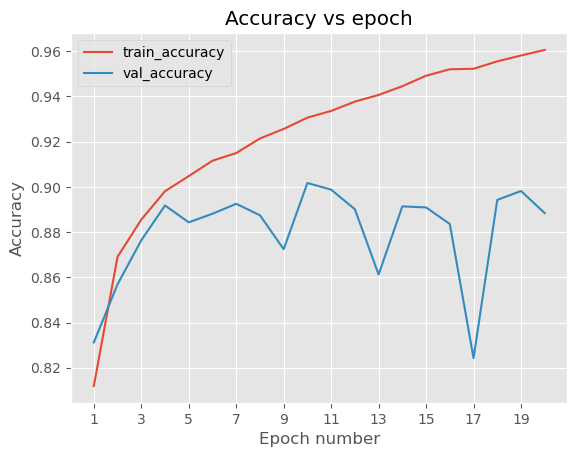

In [108]:
plt.plot(range(1, 21), history.accuracy, label="train_accuracy")
plt.plot(range(1, 21), history.val_accuracy, label="val_accuracy")
plt.legend()
plt.xticks(range(1, 21, 2))
plt.title("Accuracy vs epoch")
plt.ylabel("Accuracy")
plt.xlabel("Epoch number");

In [110]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0) 
print("Test loss:", loss) 
print("Test accuracy:", accuracy)

Test loss: 0.35283422470092773
Test accuracy: 0.8892999887466431


## Анализ:
Качество на трейне растет, на валидации и тесте - падает. Явное переобучение. Необходима дальнейшая работа над оптимизацией архитектуры сети. Возможно, недостаточно данных.

Как было заявлено -
"цель – научиться работать с различными моделями машинного обучения. Вам необязательно строить самую лучшую модель и получать лучшее качество на тестовых данных. Самое важное – это научиться обучать модели и анализировать полученные результаты"

Поэтому оптимизировать дальше не будем, ограничимся процессом тестирования и анализа различных архитектур.